In [1]:
import csv
import numpy as np
import os
np.random.seed(42)
import random
random.seed(42)

# Question 1

In [2]:
file_ratings = os.path.expanduser('ml-latest-small/ratings.csv')
file_movies = os.path.expanduser('ml-latest-small/movies.csv')

user_id = []
movie_id = []
ratings = []

with open(file_ratings) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        user_id.append(int(row['userId']))
        movie_id.append(int(row['movieId']))
        ratings.append(float(row['rating']))

In [3]:
user_number = len(np.unique(user_id))
movie_number = len(np.unique(movie_id))
movie_list = dict()
movie_id_u=[]
movie_idx = 0
for id in movie_id:
    if id not in movie_id_u:
        movie_list[id]=int(movie_idx)
        movie_id_u.append(id)
        movie_idx += 1
        
total_available_rating = len(user_id)
total_possible_rating = user_number * movie_number
print('Number of Users:', user_number)
print('Number of Rated Movies:', movie_number)
print('Sparsity =', float(total_available_rating) / total_possible_rating)

Number of Users: 610
Number of Rated Movies: 9724
Sparsity = 0.016999683055613623


# Question 2

ratings = [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
counts = [ 1370  2811  1791  7551  5550 20047 13136 26818  8551 13211]


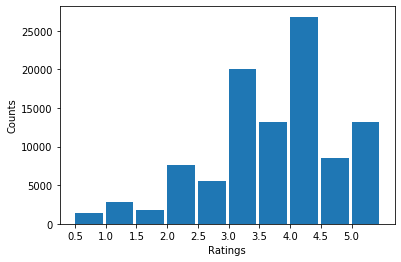

In [4]:
import matplotlib.pyplot as plt
R = np.zeros((user_number, movie_number))  
W = np.zeros((user_number, movie_number))
for i in range(len(user_id)):
    x = user_id[i] - 1
    y = int(movie_list[movie_id[i]])
    R[x,y] = ratings[i]
    W[x,y] = 1
rating_bins, ratingFreq = np.unique(np.sort(R), return_counts = True)
print('ratings =', rating_bins[1:])
print('counts =', ratingFreq[1:])
plt.bar(rating_bins[1:], ratingFreq[1:], 
        width = 0.45, tick_label = rating_bins[1:], align = 'edge')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()

# Question 3

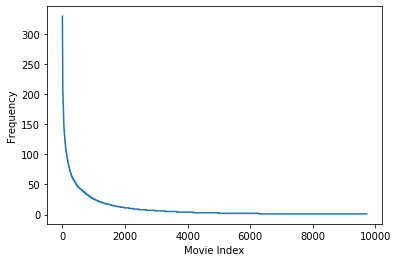

In [5]:
movieFreq = np.sum(R != 0, axis = 0)
movieFreq_dict = {m: movieFreq[movie_list[m]] for m in movie_list.keys()}
plt.plot(np.sort(movieFreq)[::-1])
plt.xlabel('Movie Index')
plt.ylabel('Frequency')
plt.show()

# Question 4

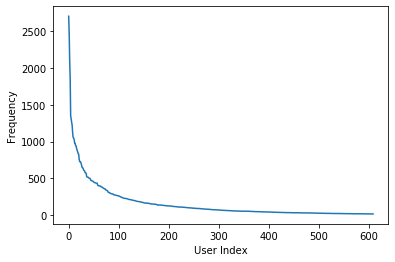

In [6]:
userFreq = np.sum(R != 0 , axis = 1)
plt.plot(np.sort(userFreq)[::-1])
plt.xlabel('User Index')
plt.ylabel('Frequency')
plt.show()

# Question 5

In [7]:
# Details are in the report.

# Question 6

variance of ratings =  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]
counts =  [5996 2313  990  265  100   22   27    4    4    1    2]


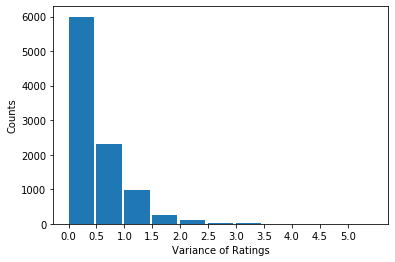

In [8]:
movieVar = [np.var([e for e in row if e != 0]) for row in np.transpose(R)]
movieVar_dict = {m: movieVar[movie_list[m]] for m in movie_list.keys()}
movieVar_bins = np.arange(0, np.max(movieVar) + 0.5, 0.5)
movieVar_height, _ = np.histogram(movieVar, movieVar_bins)
print('variance of ratings = ', movieVar_bins)
print('counts = ', movieVar_height)
plt.bar(movieVar_bins[:-1], movieVar_height,
        tick_label = movieVar_bins[:-1], width = 0.45, align = 'edge')
# plt.title("Distribution of variance of the rating values for each moive")
plt.xlabel('Variance of Ratings')
plt.ylabel('Counts')
plt.show()

# Question 10

In [9]:
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
from surprise import Reader, Dataset
from surprise.model_selection import KFold
from surprise import accuracy
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader)

kf = KFold(n_splits = 10)
kValues = range(2, 102, 2)

RMSEs10 = []; MAEs10 = []
for k in kValues:
    algo = KNNWithMeans(k = k, sim_options = {'name': 'pearson', 'user_based': True})
    rmse_kf = []; mae_kf = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        rmse_kf.append(accuracy.rmse(predictions, verbose = False))
        mae_kf.append(accuracy.mae(predictions, verbose = False))
    RMSEs10.append(np.mean(rmse_kf))
    MAEs10.append(np.mean(mae_kf))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

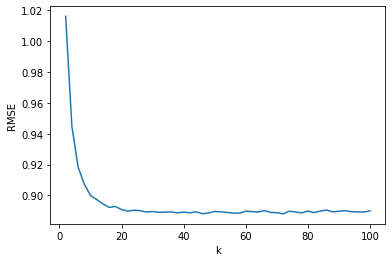

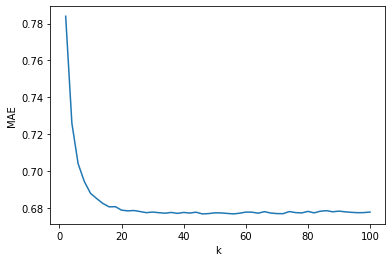

In [10]:
plt.plot(kValues, RMSEs10)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

plt.plot(kValues, MAEs10)
plt.xlabel('k')
plt.ylabel('MAE')
plt.show()